# Data exploration
## Process
1. Import files and inspect data: structure, format, columns, etc.
2. Convert data types, e.g.: string to date, int to string, etc.
3. Start plotting some of the data to see the general trends

## Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from pprint import pprint
from scipy import stats

## Daily Activity (merged)
### Import dataset from CSV file

In [2]:
csvfile = Path('Data/dailyActivity_merged.csv')
daily_activity_df = pd.read_csv(csvfile)
daily_activity_df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [3]:
id_list = daily_activity_df['Id'].unique()

print("Column data types")
print("------------")
pprint(daily_activity_df.dtypes)

print("------------")
print(f"There are {daily_activity_df['Id'].nunique()} unique Ids in the dataset")
print(id_list)

Column data types
------------
Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object
------------
There are 33 unique Ids in the dataset
[1503960366 1624580081 1644430081 1844505072 1927972279 2022484408
 2026352035 2320127002 2347167796 2873212765 3372868164 3977333714
 4020332650 4057192912 4319703577 4388161847 4445114986 4558609924
 4702921684 5553957443 5577150313 6117666160 6290855005 6775888955
 6962181067 7007744171 7086361926 8053475328 8253242879 8378563200
 8583815059 8792009665 88776

### Convert data types
* Id is a number by default. We convert it to a string for convenience in the chart (so it's treated as a discrete value, not a continuous one)

In [4]:
clean_daily_activity_df = daily_activity_df[:]
clean_daily_activity_df['Id'] = clean_daily_activity_df['Id'].astype("str")

print("Column data types")
print("------------")
pprint(clean_daily_activity_df.dtypes)

print("------------")
print(f"There are {clean_daily_activity_df['Id'].nunique()} unique Ids in the dataset")
print(clean_daily_activity_df['Id'].unique())

Column data types
------------
Id                           object
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object
------------
There are 33 unique Ids in the dataset
['1503960366' '1624580081' '1644430081' '1844505072' '1927972279'
 '2022484408' '2026352035' '2320127002' '2347167796' '2873212765'
 '3372868164' '3977333714' '4020332650' '4057192912' '4319703577'
 '4388161847' '4445114986' '4558609924' '4702921684' '5553957443'
 '5577150313' '6117666160' '6290855005' '6775888955' '6962181067'
 '7007744171' '7086361926' '80534

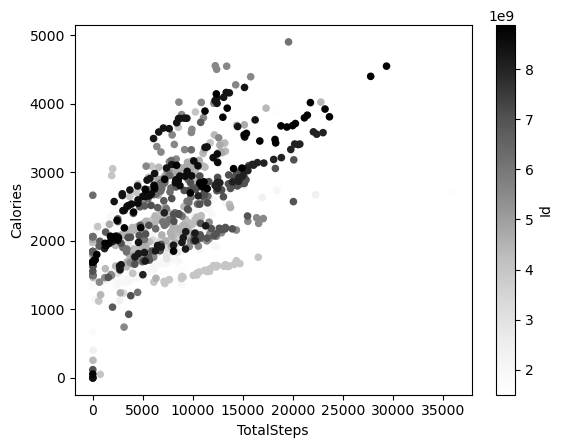

In [5]:
daily_activity_df.plot.scatter(x = 'TotalSteps', y = 'Calories', c='Id')
plt.show()

### Get overall statistics

In [6]:
total_days = clean_daily_activity_df['ActivityDate'].nunique()
print(f"The dataset covers {total_days} different days.")

The dataset covers 31 different days.


In [7]:
# Group the data by user id and count the number of different activity days
tracked_days = daily_activity_df.groupby('Id').count()['ActivityDate']

# Sort the value in descending order = look for the most active users
tracked_days = tracked_days.sort_values(ascending=False)

# Display how many users track their activity on different day counts
print('# Days | # Users')
print(tracked_days.value_counts())

# Days | # Users
31    21
30     3
29     2
26     2
28     1
20     1
19     1
18     1
4      1
Name: ActivityDate, dtype: int64


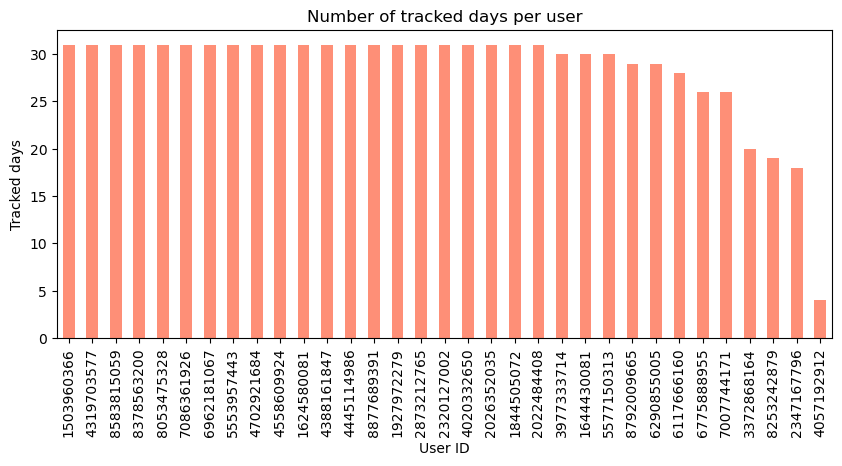

In [8]:
# Plot the data
tracked_days.plot.bar(figsize=(10,4), color = '#FE8F77')
plt.title('Number of tracked days per user')
plt.xlabel('User ID')
plt.ylabel('Tracked days')
plt.show()

,TotalSteps,Calories,Calories per step
Id,,,
1624580081,5743.903226,1483.354839,0.258249
3977333714,10984.566667,1513.666667,0.137799
2026352035,5566.870968,1540.645161,0.276752
1844505072,2580.064516,1573.483871,0.609862
2320127002,4716.870968,1724.161290,0.365531


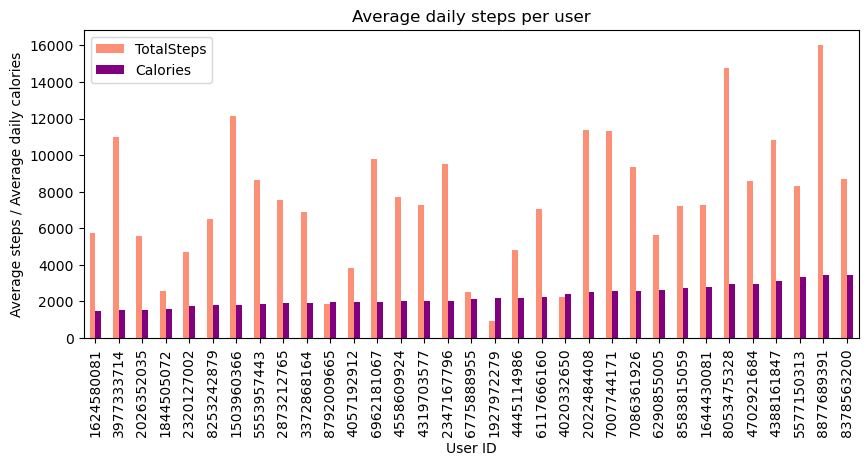

In [9]:
# Group the data by user id and count the number of different activity days
average_steps = daily_activity_df.groupby('Id').mean('numeric_only')[['TotalSteps', 'Calories']]

# Sort the value in descending order = look for the most active users
average_steps = average_steps.sort_values(ascending=True, by='Calories')
average_steps['Calories per step'] = average_steps['Calories']/average_steps['TotalSteps']

display(average_steps.head())

# Plot the data
average_steps.plot.bar(figsize=(10,4), y=['TotalSteps', 'Calories'] ,color=["#FE8F77", 'purple'])
plt.title('Average daily steps per user')
plt.xlabel('User ID')
plt.ylabel('Average steps / Average daily calories')
plt.show()

**Some conclusions from the chart above**
* Large differences in number of daily steps do not convert directly into differences in calories

,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,TotalMinutes,VeryActivePercent,FairlyActivePercent,LighltyActivePercent,SedentaryPercent,TotalHours
Id,,,,,,,,,,
8253242879,20.526316,14.315789,116.894737,1287.368421,1439.105263,0.014263,0.009948,0.081227,0.894562,23.985088
8583815059,9.677419,22.193548,138.290323,1267.225806,1437.387097,0.006733,0.015440,0.096210,0.881618,23.956452
6290855005,2.758621,3.793103,227.448276,1193.034483,1427.034483,0.001933,0.002658,0.159385,0.836024,23.783908
1624580081,8.677419,5.806452,153.483871,1257.741935,1425.709677,0.006086,0.004073,0.107654,0.882187,23.761828
2022484408,36.290323,19.354839,257.451613,1112.580645,1425.677419,0.025455,0.013576,0.180582,0.780387,23.761290
2873212765,14.096774,6.129032,308.000000,1097.193548,1425.419355,0.009890,0.004300,0.216077,0.769734,23.756989
8877689391,66.064516,9.935484,234.709677,1112.870968,1423.580645,0.046407,0.006979,0.164873,0.781741,23.726344
2320127002,1.354839,2.580645,198.193548,1220.096774,1422.225806,0.000953,0.001815,0.139354,0.857878,23.703763
3372868164,9.150000,4.100000,327.900000,1077.550000,1418.700000,0.006450,0.002890,0.231127,0.759533,23.645000


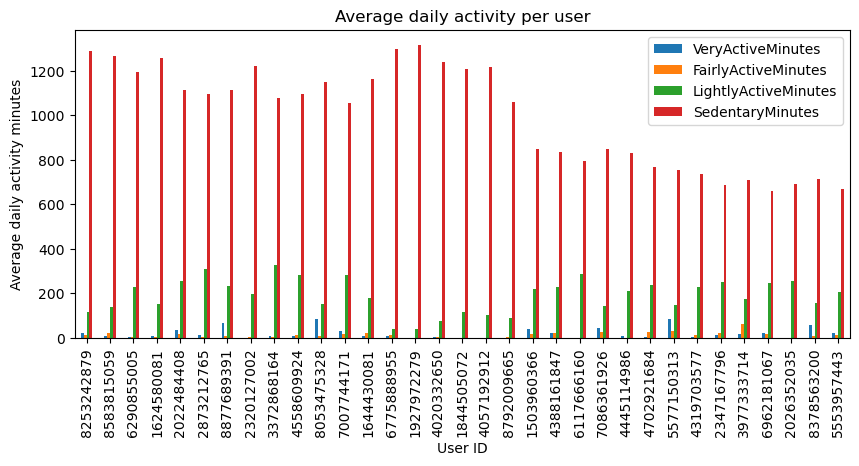

In [10]:
# Group the data by user id and count the number of different activity days
average_activity = daily_activity_df.groupby('Id').mean('numeric_only')[['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes']]

# Sum all activity minutes
average_activity['TotalMinutes'] = average_activity['VeryActiveMinutes'] + average_activity['FairlyActiveMinutes'] + average_activity['LightlyActiveMinutes'] + average_activity['SedentaryMinutes'] 

# Get percentage for each activity types
average_activity['VeryActivePercent'] = average_activity['VeryActiveMinutes'] / average_activity['TotalMinutes']
average_activity['FairlyActivePercent'] = average_activity['FairlyActiveMinutes'] / average_activity['TotalMinutes']
average_activity['LighltyActivePercent'] = average_activity['LightlyActiveMinutes'] / average_activity['TotalMinutes']
average_activity['SedentaryPercent'] = average_activity['SedentaryMinutes'] / average_activity['TotalMinutes']

# Sort the value in descending order = look for the most active users
average_activity = average_activity.sort_values(ascending=False, by='TotalMinutes')
average_activity['TotalHours'] = average_activity['TotalMinutes']/60

display(average_activity.head(33))

# Plot the data
average_activity.plot.bar(figsize=(10,4), y=['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes'])
plt.title('Average daily activity per user')
plt.xlabel('User ID')
plt.ylabel('Average daily activity minutes')
plt.show()

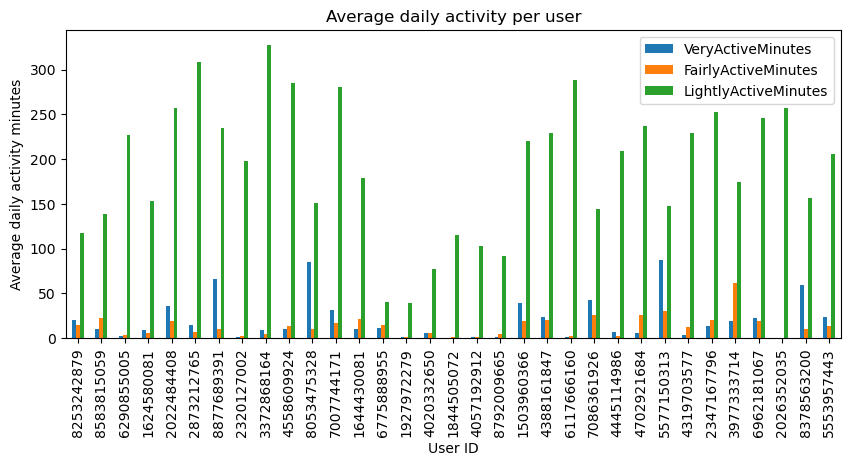

In [11]:
# Plot the data
average_activity.plot.bar(figsize=(10,4), y=['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes'])
plt.title('Average daily activity per user')
plt.xlabel('User ID')
plt.ylabel('Average daily activity minutes')
plt.show()

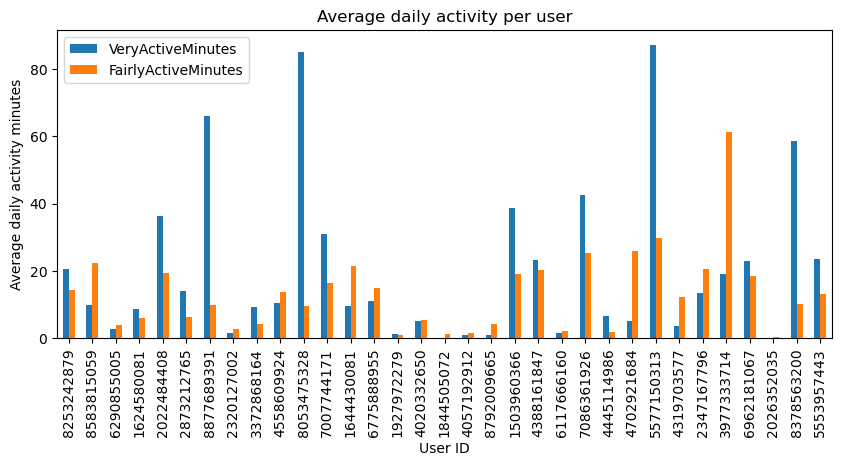

In [12]:
# Plot the data
average_activity.plot.bar(figsize=(10,4), y=['VeryActiveMinutes', 'FairlyActiveMinutes'])
plt.title('Average daily activity per user')
plt.xlabel('User ID')
plt.ylabel('Average daily activity minutes')
plt.show()

,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance
Id,,,,,,,
8877689391,13.212903,13.212903,0.000000,6.637419,0.337742,6.188710,0.005161
8053475328,11.475161,11.475161,0.000000,8.514839,0.423871,2.533871,0.000000
4388161847,8.393226,8.393226,0.000000,1.719355,0.901935,5.396129,0.000000
2022484408,8.084193,8.084193,0.000000,2.421613,0.720000,4.942581,0.000000
7007744171,8.015385,7.575769,2.118673,2.415000,0.738462,4.861538,0.000769


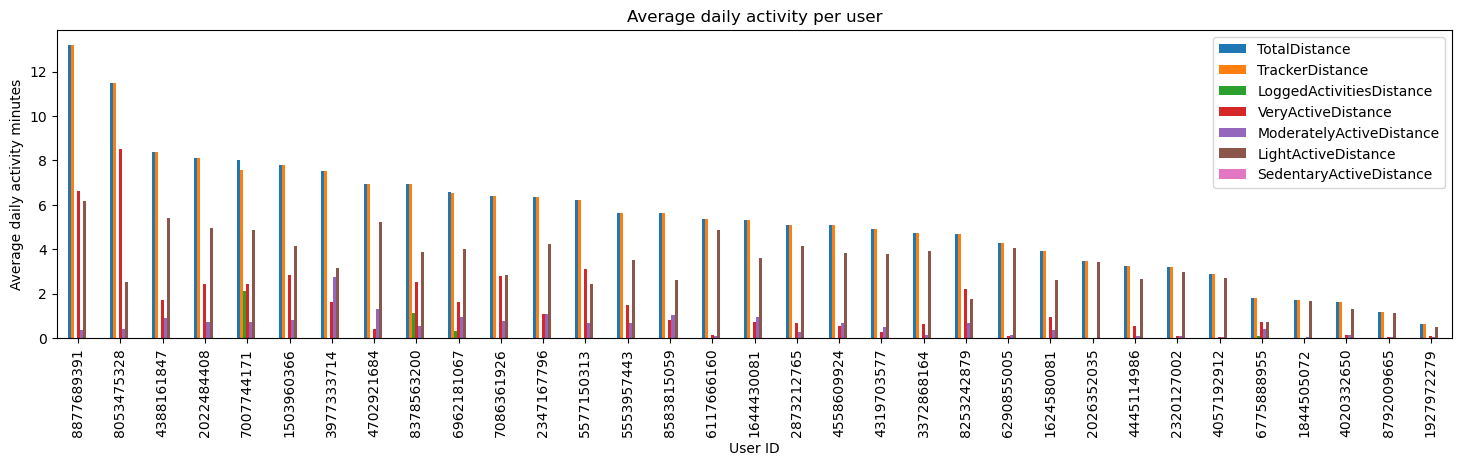

In [13]:
# Group the data by user id and count the number of different activity days
average_distance = daily_activity_df.groupby('Id').mean('numeric_only')
average_distance = average_distance[['TotalDistance', 'TrackerDistance', 'LoggedActivitiesDistance', 'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance']]

# Sort the value in descending order = look for the most active users
average_distance = average_distance.sort_values(ascending=False, by='TotalDistance')

display(average_distance.head())

# Plot the data
average_distance.plot.bar(figsize=(18,4))
plt.title('Average daily activity per user')
plt.xlabel('User ID')
plt.ylabel('Average daily activity minutes')
plt.show()

## Merged data

In [14]:
# -- Datasets --
# * tracked_days
# * average_steps
# * average_activity
# * average_distance


daily_average_df = pd.merge(tracked_days, average_steps, how='outer', on='Id')
daily_average_df = daily_average_df.merge(average_activity, how='outer', on='Id')
daily_average_df = daily_average_df.merge(average_distance, how='outer', on='Id')
daily_average_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 1503960366 to 4057192912
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ActivityDate              33 non-null     int64  
 1   TotalSteps                33 non-null     float64
 2   Calories                  33 non-null     float64
 3   Calories per step         33 non-null     float64
 4   VeryActiveMinutes         33 non-null     float64
 5   FairlyActiveMinutes       33 non-null     float64
 6   LightlyActiveMinutes      33 non-null     float64
 7   SedentaryMinutes          33 non-null     float64
 8   TotalMinutes              33 non-null     float64
 9   VeryActivePercent         33 non-null     float64
 10  FairlyActivePercent       33 non-null     float64
 11  LighltyActivePercent      33 non-null     float64
 12  SedentaryPercent          33 non-null     float64
 13  TotalHours                33 non-null     float64


R-value: 0.44 (weak correlation)
Model: Y = 0.07 * x + 1766.51


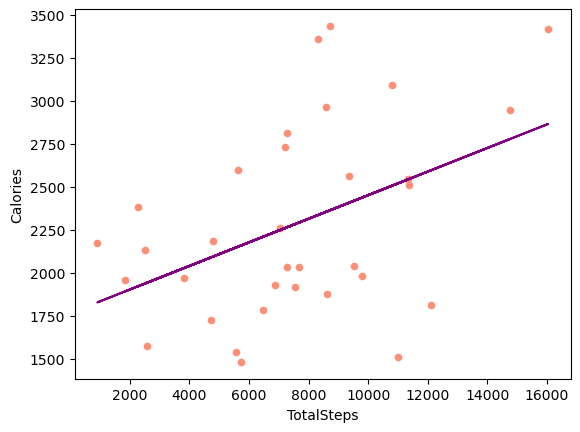

In [16]:
def pearson(r):
    if abs(r) < 0.3:
        print(f"R-value: {r:.2f} (no correlation)")
    elif abs(r) < 0.5:
        print(f"R-value: {r:.2f} (weak correlation)")
    elif abs(r) < 0.7:
        print(f"R-value: {r:.2f} (moderate correlation)")
    else:
        print(f"R-value: {r:.2f} (strong correlation)")


# Linear regression model
x_data = daily_average_df['TotalSteps']
y_data = daily_average_df['Calories']
[slope, intercept, rvalue, pvalue, stdeve] = stats.linregress(x_data,y_data)
regress_values = slope*x_data + intercept

pearson(rvalue)
print(f"Model: Y = {slope:.2f} * x + {intercept:.2f}")

# Plot data and regression model
daily_average_df.plot.scatter(x='TotalSteps', y='Calories', color = '#FE8F77')
plt.plot(x_data, regress_values, 'purple')

plt.show()

R-value: 0.55 (moderate correlation)
Model: Y = 110.90 * x + 1683.70


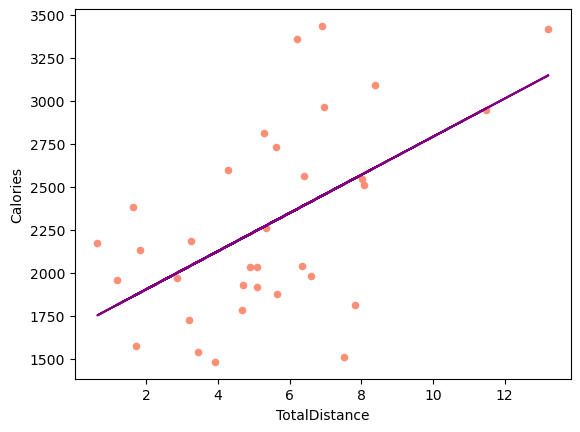

In [17]:
# Linear regression model
x_data = daily_average_df['TotalDistance']
y_data = daily_average_df['Calories']
[slope, intercept, rvalue, pvalue, stdeve] = stats.linregress(x_data,y_data)
regress_values = slope*x_data + intercept
pearson(rvalue)
print(f"Model: Y = {slope:.2f} * x + {intercept:.2f}")

# Plot data and regression model
daily_average_df.plot.scatter(x='TotalDistance', y='Calories', color = '#FE8F77')
plt.plot(x_data, regress_values, 'purple')
plt.show()

R-value: 0.63 (moderate correlation)
Model: Y = 14.89 * x + 1979.97


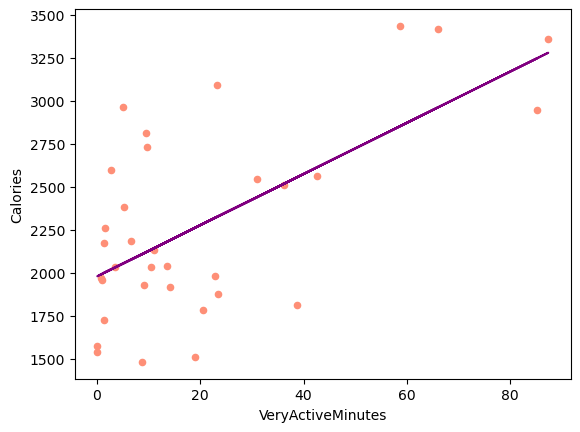

R-value: 0.16 (no correlation)
Model: Y = 7.33 * x + 2185.26


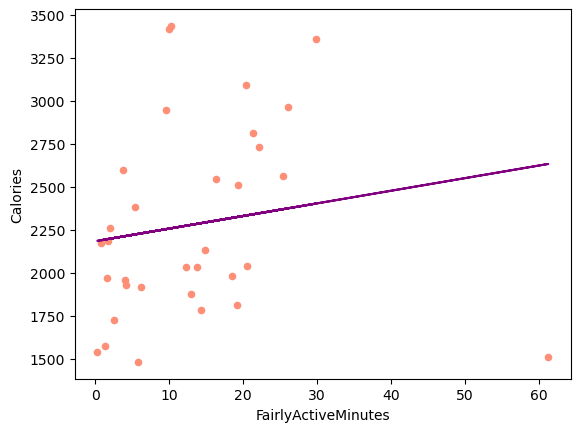

R-value: -0.00 (no correlation)
Model: Y = -0.03 * x + 2288.25


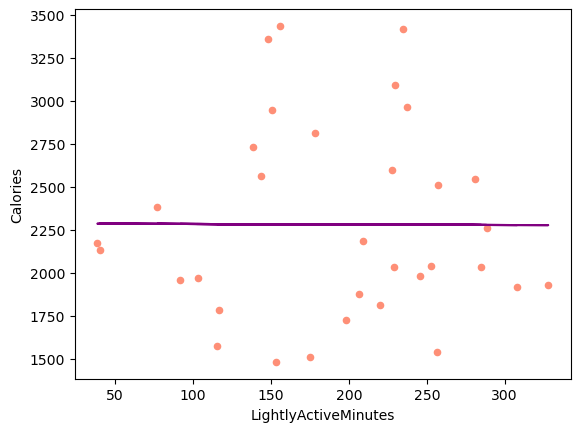

In [18]:
# Linear regression model
x_data = daily_average_df['VeryActiveMinutes']
y_data = daily_average_df['Calories']
[slope, intercept, rvalue, pvalue, stdeve] = stats.linregress(x_data,y_data)
regress_values = slope*x_data + intercept
pearson(rvalue)
print(f"Model: Y = {slope:.2f} * x + {intercept:.2f}")

# Plot data and regression model
daily_average_df.plot.scatter(x='VeryActiveMinutes', y='Calories', color = '#FE8F77')
plt.plot(x_data, regress_values, 'purple')
plt.show()

# Linear regression model
x_data = daily_average_df['FairlyActiveMinutes']
y_data = daily_average_df['Calories']
[slope, intercept, rvalue, pvalue, stdeve] = stats.linregress(x_data,y_data)
regress_values = slope*x_data + intercept
pearson(rvalue)
print(f"Model: Y = {slope:.2f} * x + {intercept:.2f}")

# Plot data and regression model
daily_average_df.plot.scatter(x='FairlyActiveMinutes', y='Calories', color = '#FE8F77')
plt.plot(x_data, regress_values, 'purple')
plt.show()

# Linear regression model
x_data = daily_average_df['LightlyActiveMinutes']
y_data = daily_average_df['Calories']
[slope, intercept, rvalue, pvalue, stdeve] = stats.linregress(x_data,y_data)
regress_values = slope*x_data + intercept
pearson(rvalue)
print(f"Model: Y = {slope:.2f} * x + {intercept:.2f}")


# Plot data and regression model
daily_average_df.plot.scatter(x='LightlyActiveMinutes', y='Calories', color = '#FE8F77')
plt.plot(x_data, regress_values, 'purple')
plt.show()

In [19]:
daily_average_df.head(33)

,ActivityDate,TotalSteps,Calories,Calories per step,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,TotalMinutes,VeryActivePercent,...,LighltyActivePercent,SedentaryPercent,TotalHours,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance
Id,,,,,,,,,,,,,,,,,,,,,
1503960366,31,12116.741935,1816.419355,0.149910,38.709677,19.161290,219.935484,848.161290,1125.967742,0.034379,...,0.195330,0.753273,18.766129,7.809677,7.809677,0.000000,2.858387,0.794194,4.152903,0.000000
4319703577,31,7268.838710,2037.677419,0.280331,3.580645,12.322581,228.774194,735.806452,980.483871,0.003652,...,0.233328,0.750452,16.341398,4.892258,4.892258,0.000000,0.278065,0.502258,3.768710,0.000000
8583815059,31,7198.516129,2732.032258,0.379527,9.677419,22.193548,138.290323,1267.225806,1437.387097,0.006733,...,0.096210,0.881618,23.956452,5.615484,5.615484,0.000000,0.798065,1.020645,2.617419,0.000000
8378563200,31,8717.709677,3436.580645,0.394207,58.677419,10.258065,156.096774,716.129032,941.161290,0.062346,...,0.165855,0.760899,15.686022,6.913548,6.913548,1.116158,2.503548,0.519032,3.889355,0.000000
8053475328,31,14763.290323,2945.806452,0.199536,85.161290,9.580645,150.967742,1148.000000,1393.709677,0.061104,...,0.108321,0.823701,23.228495,11.475161,11.475161,0.000000,8.514839,0.423871,2.533871,0.000000
7086361926,31,9371.774194,2566.354839,0.273839,42.580645,25.354839,143.838710,850.451613,1062.225806,0.040086,...,0.135413,0.800632,17.703763,6.388065,6.388065,0.000000,2.781290,0.773226,2.818710,0.000000
6962181067,31,9794.806452,1982.032258,0.202355,22.806452,18.516129,245.806452,662.322581,949.451613,0.024021,...,0.258893,0.697584,15.824194,6.585806,6.519355,0.323700,1.616452,0.960000,4.001613,0.006774
5553957443,31,8612.580645,1875.677419,0.217783,23.419355,13.000000,206.193548,668.354839,910.967742,0.025708,...,0.226346,0.733676,15.182796,5.639677,5.639677,0.000000,1.464194,0.669032,3.504516,0.000000
4702921684,31,8572.064516,2965.548387,0.345955,5.129032,26.032258,237.483871,766.419355,1035.064516,0.004955,...,0.229439,0.740456,17.251075,6.955161,6.955161,0.000000,0.417419,1.304839,5.225484,0.000000


## Data per user

In [20]:
daily_activity_df.dtypes

Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object

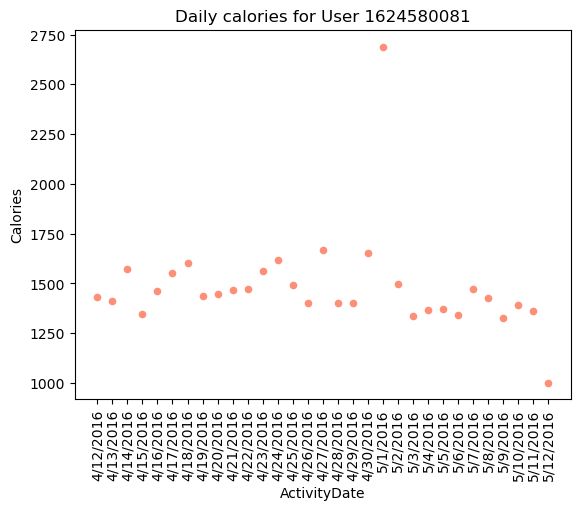

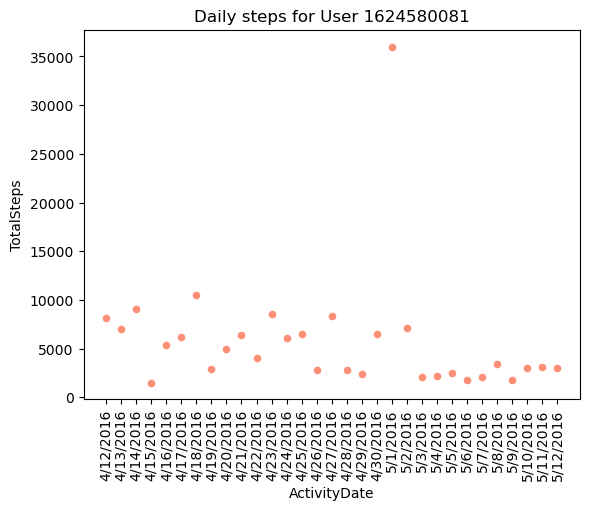

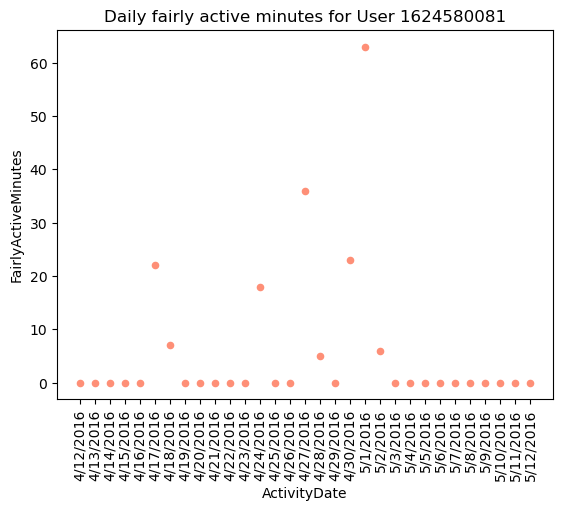

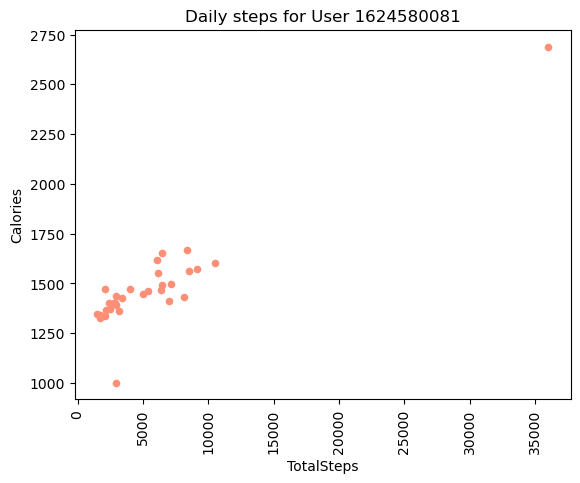

In [21]:
# Interesting users
# 3977333714
# 1624580081

id = 1624580081
user_data_df = daily_activity_df.loc[daily_activity_df['Id'] == id,:]

data_points = ['Calories', 'TotalSteps', 'FairlyActiveMinutes']
descriptions = ['calories', 'steps', 'fairly active minutes']

for i in range(len(data_points)):
    user_data_df.plot.scatter(x='ActivityDate', y=data_points[i], title = f"Daily {descriptions[i]} for User {id}", color = '#FE8F77')
    plt.xticks(rotation=90)
    plt.show()

user_data_df.plot.scatter(x='TotalSteps', y='Calories', title = f"Daily steps for User {id}", color = '#FE8F77')
plt.xticks(rotation=90)
plt.show()